In [1]:
# coding=utf-8
from pythonpic import plotting_parser
from pythonpic.configs import run_coldplasma, run_twostream
from pythonpic.visualization import animation
from pythonpic.helper_functions.physics import epsilon_zero, lightspeed
from matplotlib import rc, animation
%matplotlib inline
rc('animation', html='html5')

show_static = True
show_animation = False
args = True, True, False, False, False
args_animation = False, False, True, False, False

In [2]:
!rm -r data_analysis

In [3]:
plasma_frequency = 1
push_mode = 2
N_electrons = 1024
NG = 64
qmratio = -1
T = 10
scaling = 1
c = 10
epsilon_zero = 1
S = run_coldplasma.cold_plasma_oscillations(f"COSCALING", qmratio=qmratio, plasma_frequency=plasma_frequency, NG=NG,
                             N_electrons=N_electrons, epsilon_zero=epsilon_zero, push_mode=push_mode, save_data=False,
                                            T = T, scaling=scaling, c=c).lazy_run()

epsilon_zero:1
save_data:False
Path is data_analysis/coldplasma/COSCALING/COSCALING.hdf5
Running simulation
Saved file to data_analysis/coldplasma/COSCALING/COSCALING.hdf5
Postprocessing grid.
Postprocessing electrons.
Postprocessing simulation.


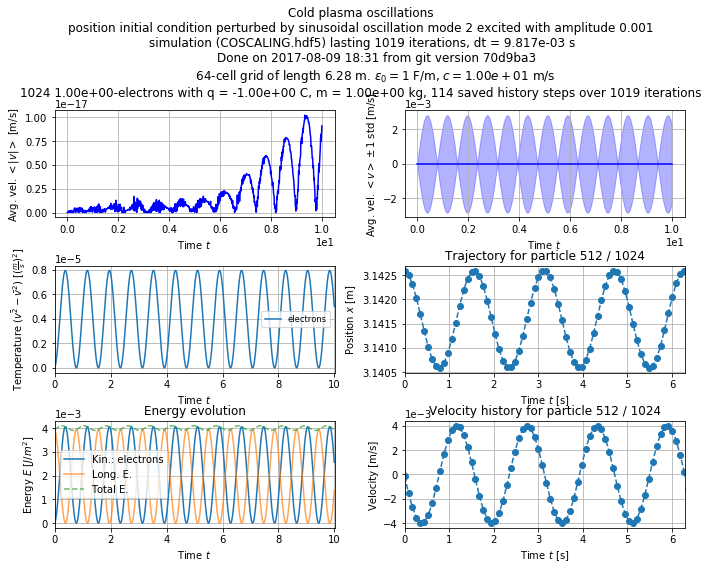

In [4]:
run_coldplasma.plots(S, *args, alpha=0.3)

In [5]:
S2 = run_twostream.two_stream_instability(f"TSPLOTTING",
                                          plasma_frequency = plasma_frequency,
                                          NG = 128,
                                          T = 600,
                                          N_electrons = 7000,
                                          v0 = 0.01,
                                         ).lazy_run()

Running two stream instability
plasma frequency: 1
timestep: 0.04908738521234052
iloczyn: 0.04908738521234052
Pusher seems stable with dt * plasma frequency = 4.91e-02 < 2.
k0*v0/w0 is 0.01 which means the regime is unstable(stable above sqrt(2))
Path is data_analysis/twostream/TSPLOTTING/TSPLOTTING.hdf5
Running simulation


/home/dominik/Inzynierka/pythonpic/pythonpic/helper_functions/physics.py:27: UserWarning: Plasma parameter seems low at 0.002! Low density plasma.
  warnings.warn(f"Plasma parameter seems low at {pp:.3f}! Low density plasma.")


Saved file to data_analysis/twostream/TSPLOTTING/TSPLOTTING.hdf5
Postprocessing grid.
Postprocessing beam1.
Postprocessing beam2.
Postprocessing simulation.


In [6]:
# !rm -r data_analysis/twostream/

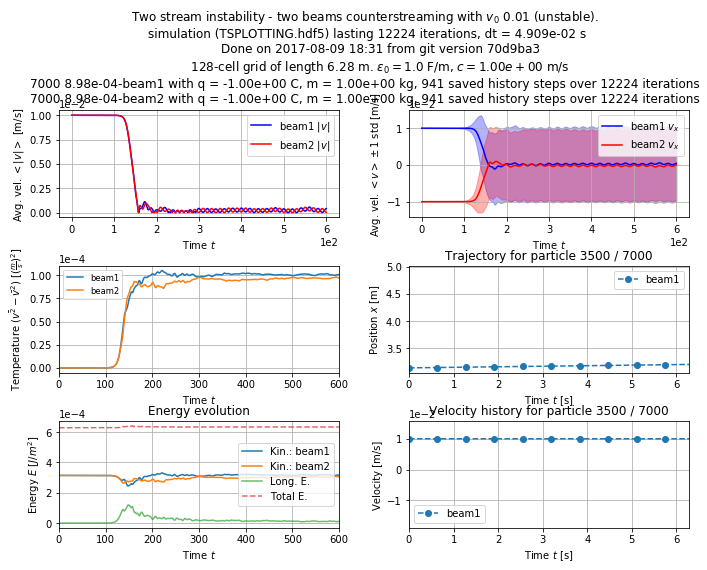

In [7]:
run_twostream.plots(S2, *args, alpha=0.3)